In [1]:
# # Install Dependencies and Fetch Dataset

In [2]:
random_state = 1
from pprint import pprint

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [4]:
# ## Data Preparation

In [5]:
# test and train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [6]:
# # Exploratory Data Analysis (EDA)

In [7]:
# ## Data Inspection

In [8]:
import pandas as pd
# Display the first few rows of the features and target
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4152            6.3              0.13         0.42             1.1      0.043   
931             7.4              0.61         0.01             2.0      0.074   
4252            6.4              0.28         0.27            11.0      0.042   
1743            8.1              0.20         0.40             2.0      0.037   
1238            8.1              0.73         0.00             2.5      0.081   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
4152                 63.0                 146.0  0.99066  3.13       0.72   
931                  13.0                  38.0  0.99748  3.48       0.65   
4252                 45.0                 148.0  0.99786  3.14       0.46   
1743                 19.0                  87.0  0.99210  3.12       0.54   
1238                 12.0                  24.0  0.99798  3.38       0.46   

      alcohol  
4152     11.2  
931       9.8  
42

In [9]:
# Display the shape of the features and target
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (5197, 11)
Shape of y_train: (5197, 1)
Shape of X_test: (1300, 11)
Shape of y_test: (1300, 1)


In [10]:
# Display the data types of the features and target
print("Data types of features (X):")
print(X_train.dtypes)
print("\nData types of target (y):")
print(y_train.dtypes)

Data types of features (X):
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

Data types of target (y):
quality    int64
dtype: object


In [11]:
# ## Check for Missing Values

In [12]:
missing_values_X = X.isnull().sum()
missing_values_y = y.isnull().sum()
print("Missing values in features (X):")
print(missing_values_X)
print("\nMissing values in target (y):")
print(missing_values_y)

Missing values in features (X):
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Missing values in target (y):
quality    0
dtype: int64


In [13]:
# ## Summary Statistics

In [14]:
summary_X_train = X_train.describe()
print("Summary statistics for features (X_train):")
print(summary_X_train)

Summary statistics for features (X_train):
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    5197.000000       5197.000000  5197.000000     5197.000000   
mean        7.218838          0.340615     0.317935        5.407129   
std         1.295745          0.164782     0.145180        4.719472   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.410000     0.390000        8.100000   
max        15.900000          1.330000     1.230000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  5197.000000          5197.000000           5197.000000  5197.000000   
mean      0.056392            30.542043            115.370887     0.994695   
std       0.035482            17.876644             56.604784     0.002990   
min  

In [15]:
summary_y_train = y_train.describe()
print("\nSummary statistics for target (y_train):")
print(summary_y_train)


Summary statistics for target (y_train):
           quality
count  5197.000000
mean      5.825476
std       0.878131
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       9.000000


In [16]:
# ## Visualizations

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

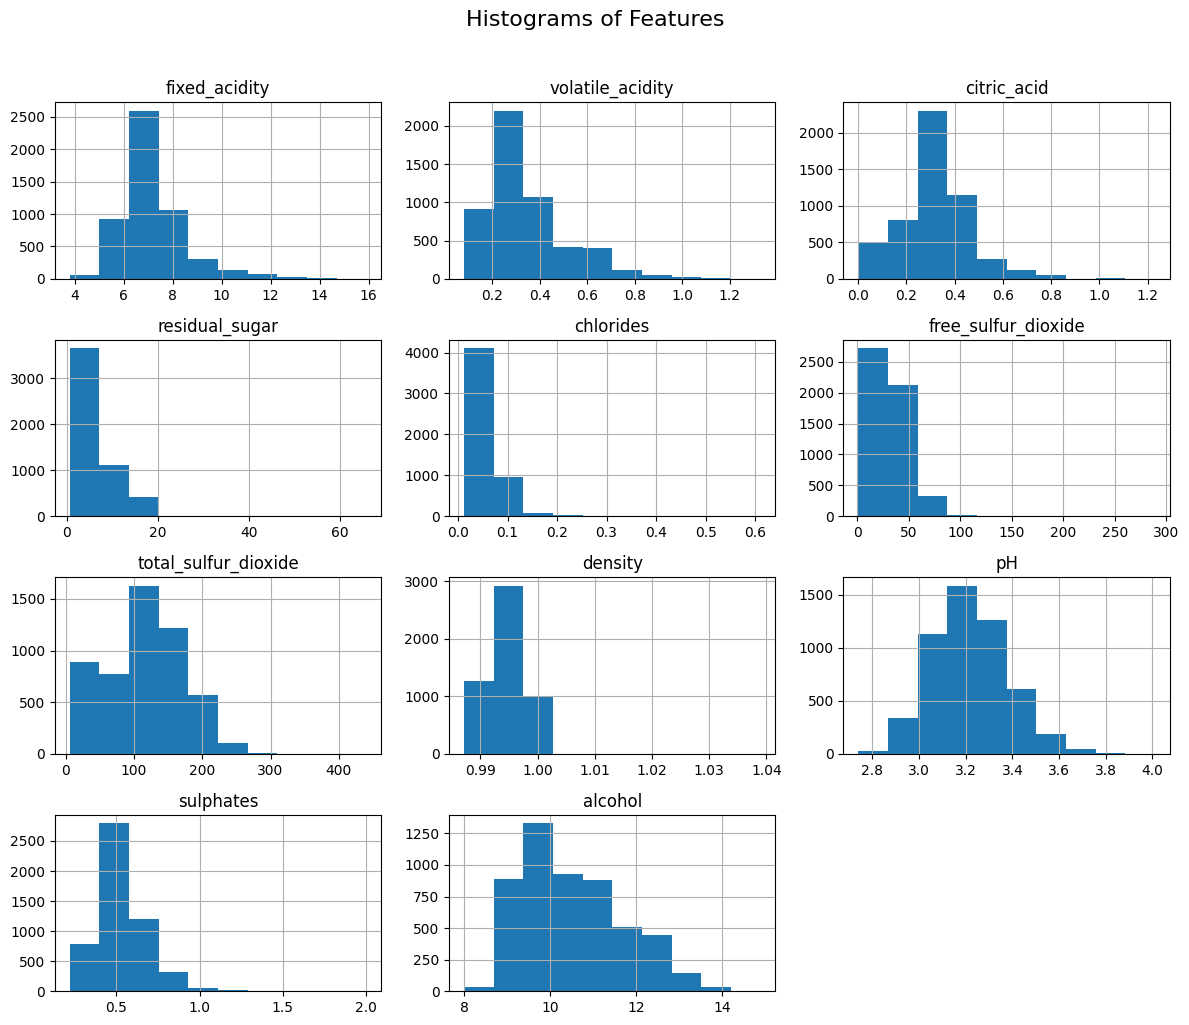

In [18]:
# Histograms for each feature
X_train.hist(figsize=(12, 10))
plt.suptitle("Histograms of Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

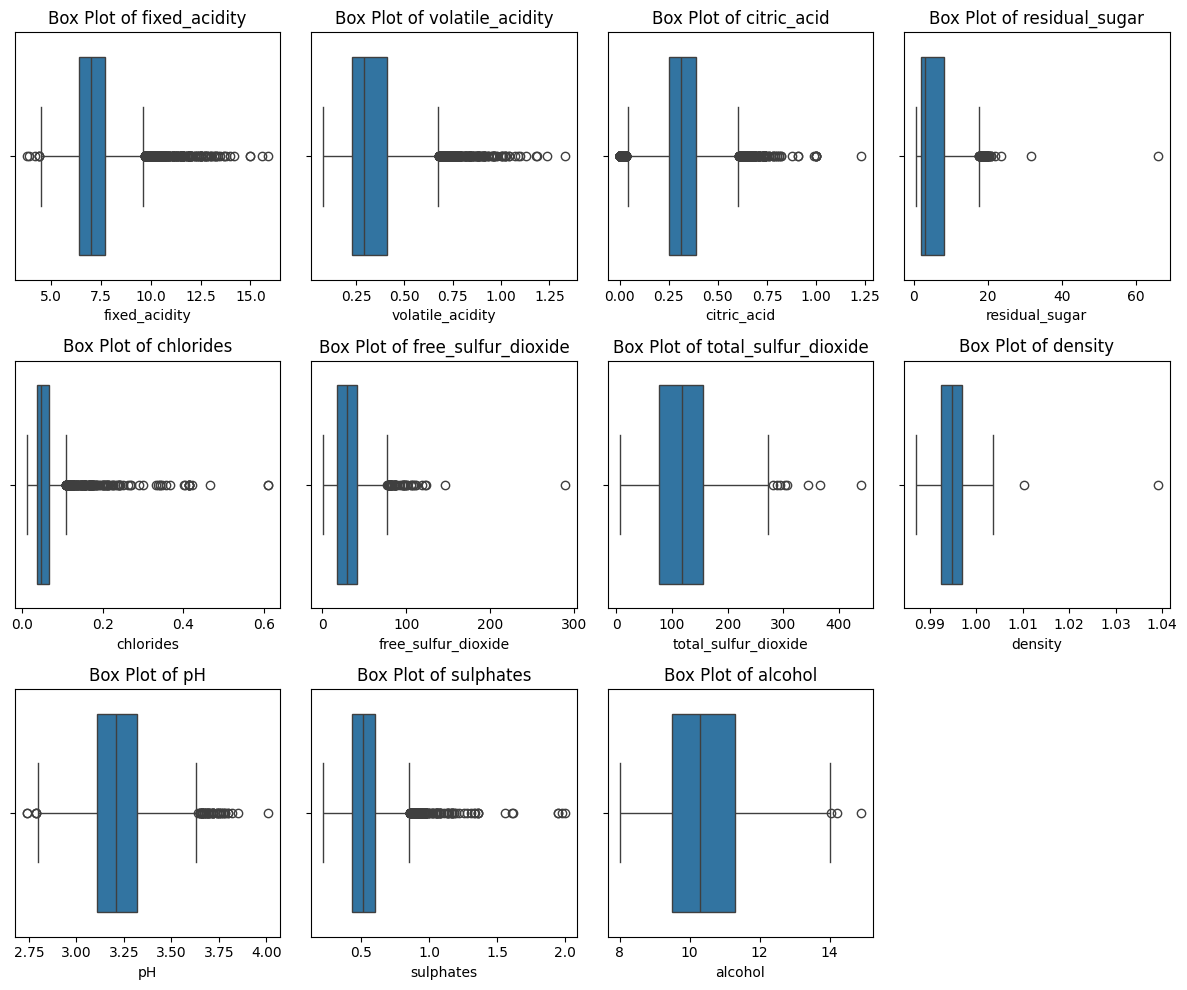

In [19]:
# Box plots for each feature
plt.figure(figsize=(12, 10))
for i, column in enumerate(X_train.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=X_train[column])
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

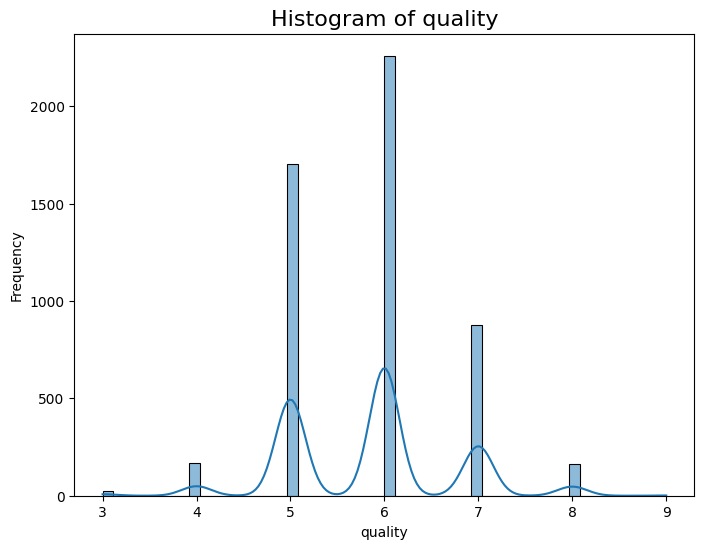

In [20]:
# Histogram of quality
plt.figure(figsize=(8, 6))
sns.histplot(y_train["quality"], kde=True)
plt.title("Histogram of quality", fontsize=16)
plt.xlabel("quality")
plt.ylabel("Frequency")
plt.show()

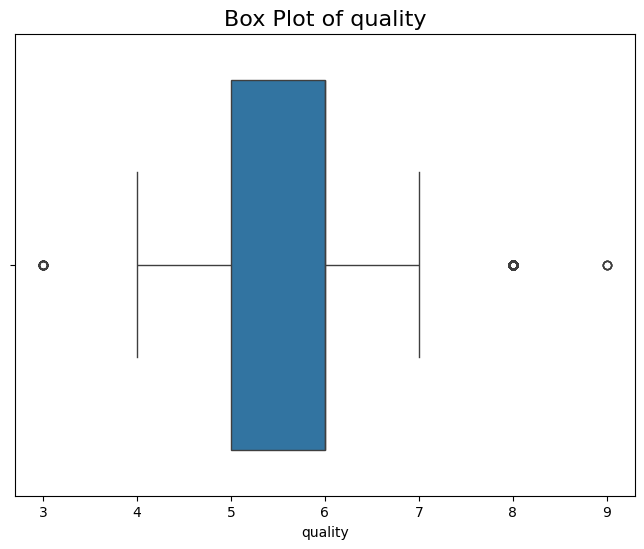

In [21]:
# Box Plot of quality
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train["quality"])
plt.title("Box Plot of quality", fontsize=16)
plt.xlabel("quality")
plt.show()

In [22]:
# ## Correlation Analysis

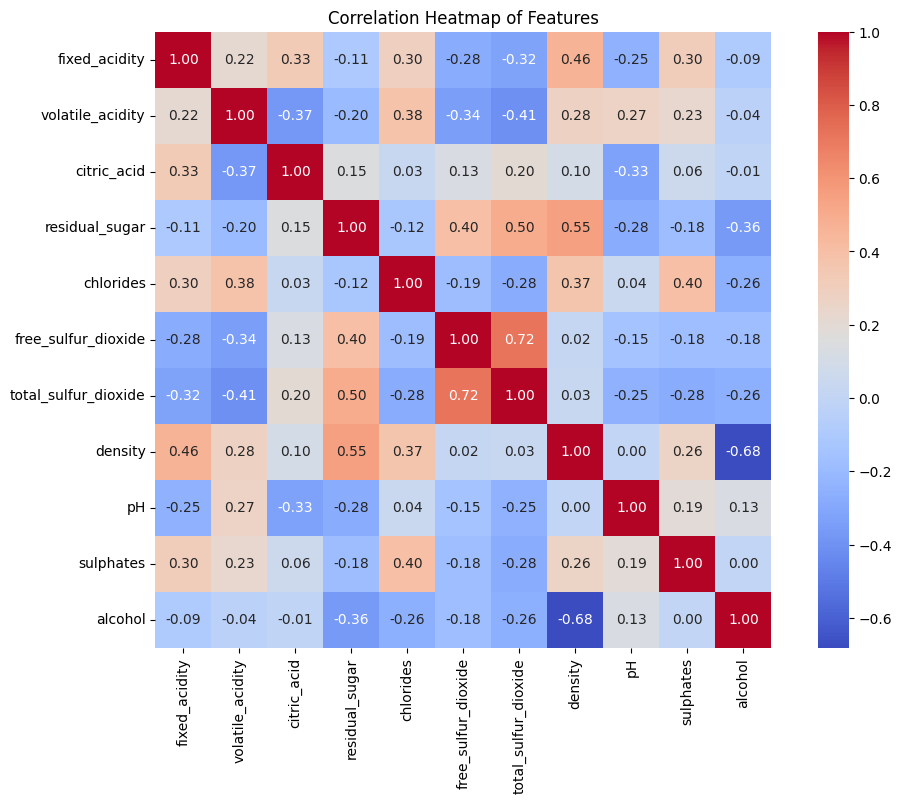

In [23]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

In [24]:
# # Bayesian Optimization

In [25]:
# ## Objective Function

In [26]:
# The goal is to optimize the wine quality using Bayesian optimization. The objective function will be defined to minimize the negative of the quality, as we want to maximize it. The parameters to be optimized will include the features of the wine.

In [27]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor

In [28]:
# Define the model
model = RandomForestRegressor(random_state=random_state)

In [29]:
# Define the search space for hyperparameters
search_space = {
    'n_estimators': (50, 500),  # Number of trees in the forest
    'max_depth': (5, 50),        # Maximum depth of the tree
    'min_samples_split': (2, 20), # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

In [30]:
# Define the Bayesian optimization search
opt = BayesSearchCV(
    model,
    search_space,
    n_iter=50,  # Number of iterations for optimization
    scoring='neg_mean_squared_error',  # Objective function to minimize
    cv=5,  # Cross-validation splitting strategy
    n_jobs=-1,  # Use all available cores
    random_state=random_state
)

In [31]:
# Fit the model using Bayesian optimization
opt.fit(X_train, y_train.values.ravel())

/home/codespace/.local/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.False_, np.int64(50), np.str_('sqrt'), np.int64(1), np.int64(2), np.int64(500)] before, using random point [True, np.int64(22), 'sqrt', np.int64(17), np.int64(7), np.int64(401)]
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.False_, np.int64(50), np.str_('sqrt'), np.int64(1), np.int64(2), np.int64(500)] before, using random point [True, np.int64(35), None, np.int64(2), np.int64(17), np.int64(224)]
  warnings.warn(


,estimator,RandomForestR...andom_state=1)
,search_spaces,"{'bootstrap': [True, False], 'max_depth': (5, ...), 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': (1, ...), ...}"
,optimizer_kwargs,None
,n_iter,50
,scoring,'neg_mean_squared_error'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


In [32]:
# Display the best parameters found by Bayesian optimization
print("Best parameters found by Bayesian optimization:")
pprint(opt.best_params_)

Best parameters found by Bayesian optimization:
OrderedDict([('bootstrap', False),
             ('max_depth', 19),
             ('max_features', 'log2'),
             ('min_samples_leaf', 1),
             ('min_samples_split', 2),
             ('n_estimators', 327)])


In [33]:
# Display the best score achieved
print(f"Best score achieved (negative MSE): {opt.best_score_}")

Best score achieved (negative MSE): -0.3707617608493091


In [34]:
# Evaluate the optimized model on the test set
from sklearn.metrics import mean_squared_error
y_pred = opt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

Mean Squared Error on test set: 0.3527902022246346


In [35]:
# ## Use Optimized Model to Optimize Quality using Bayesian Optimization

In [36]:
# Use the optimized model to predict quality
optimized_quality = opt.predict(X_test)
print("Predicted quality using Optimized Model:")
print(optimized_quality)

Predicted quality using Optimized Model:
[5.36932686 5.0475511  5.3839733  ... 5.01698474 5.53927114 6.96335449]


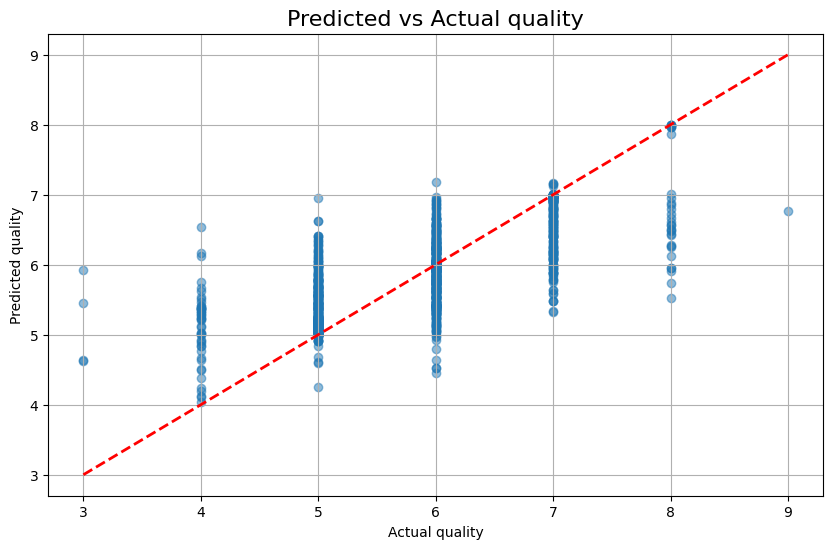

In [37]:
# Visualize the predicted vs actual quality
plt.figure(figsize=(10, 6))
plt.scatter(y_test, optimized_quality, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual quality', fontsize=16)
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')
plt.grid()
plt.show()

In [38]:
# First check the actual column names in the DataFrame
print("Actual column names in X_train:")
print(X_train.columns.tolist())

Actual column names in X_train:
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [39]:
# Objective function for Bayesian optimization
def objective_function(params):
    """
    Objective function to minimize the negative of the quality.
    This function takes a the parameters of the wine and returns the negative quality.
    """
    # Unpack the parameters
    fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol = params
    # Create a DataFrame with the parameters
    wine_feat = pd.DataFrame({
        'fixed_acidity': [fixed_acidity],
        'volatile_acidity': [volatile_acidity],
        'citric_acid': [citric_acid],
        'residual_sugar': [residual_sugar],
        'chlorides': [chlorides],
        'free_sulfur_dioxide': [free_sulfur_dioxide],
        'total_sulfur_dioxide': [total_sulfur_dioxide],
        'density': [density],
        'pH': [pH],
        'sulphates': [sulphates],
        'alcohol': [alcohol]
    })
    # Predict the quality using the optimized model
    predicted_quality = opt.predict(wine_feat)
    # Return the negative quality (as we want to maximize it)
    return -predicted_quality[0]

In [40]:
# Define the search space for the parameters of the wine based on the min and max values in the training set
search_space_wine = [
    (X_train['fixed_acidity'].min(), X_train['fixed_acidity'].max()),  # fixed_acidity
    (X_train['volatile_acidity'].min(), X_train['volatile_acidity'].max()),  # Slag
    (X_train['citric_acid'].min(), X_train['citric_acid'].max()),  # Ash
    (X_train['residual_sugar'].min(), X_train['residual_sugar'].max()),  # residual_sugar
    (X_train['chlorides'].min(), X_train['chlorides'].max()),  # chlorides
    (X_train['free_sulfur_dioxide'].min(), X_train['free_sulfur_dioxide'].max()),  # free_sulfur_dioxide
    (X_train['total_sulfur_dioxide'].min(), X_train['total_sulfur_dioxide'].max()),  # total_sulfur_dioxide
    (X_train['density'].min(), X_train['density'].max()),  # density
    (X_train['pH'].min(), X_train['pH'].max()),  # pH
    (X_train['sulphates'].min(), X_train['sulphates'].max()),  # sulphates
    (X_train['alcohol'].min(), X_train['alcohol'].max())  # alcohol
]

In [41]:
from skopt import gp_minimize
# Perform Bayesian optimization to find the optimal wine parameters
result = gp_minimize(
    objective_function,
    search_space_wine,
    n_calls=50,  # Number of evaluations
    random_state=random_state,
    verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0184
Function value obtained: -4.9480
Current minimum: -4.9480
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0202
Function value obtained: -5.7737
Current minimum: -5.7737
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0215
Function value obtained: -5.6942
Current minimum: -5.7737
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0159
Function value obtained: -5.1223
Current minimum: -5.7737
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0157
Function value obtained: -5.9480
Current minimum: -5.9480
Iteration No: 6 started. 

In [42]:
# Neatly display the best parameters and the best predicted quality along with column names
best_params = result.x
best_quality = -result.fun  # Negate the result to get the actual quality
print("Best parameters found by Bayesian optimization:")
for i, param in enumerate(best_params):
    print(f"{X_train.columns[i]}: {param}")
print(f"Best predicted quality: {best_quality}")

Best parameters found by Bayesian optimization:
fixed_acidity: 3.8
volatile_acidity: 0.08
citric_acid: 0.7400718912116004
residual_sugar: 39.91112985938103
chlorides: 0.32193605841450296
free_sulfur_dioxide: 89.80321967749578
total_sulfur_dioxide: 6.0
density: 0.98711
pH: 4.01
sulphates: 2.0
alcohol: 13.342727729730974
Best predicted quality: 6.856269113149847


In [43]:
# ## Use XGBoost for the Model instead of Random Forest

In [44]:
from xgboost import XGBRegressor

In [45]:
# Define the XGBoost model
xgb_model = XGBRegressor(random_state=random_state, n_jobs=-1)

In [46]:
# Define the Bayesian optimization search for XGBoost hyperparameters
xgb_search_space = {
    'n_estimators': (50, 500),  # Number of trees in the forest
    'max_depth': (3, 10),        # Maximum depth of the tree
    'learning_rate': (0.01, 0.3, 'uniform'),  # Step size shrinkage used in update to prevent overfitting
    'subsample': (0.5, 1.0, 'uniform'),  # Subsample ratio of the training instances
    'colsample_bytree': (0.5, 1.0, 'uniform'),  # Subsample ratio of columns when constructing each tree
    'gamma': (0, 5),  # Minimum loss reduction required to make a further partition on a leaf
    'reg_alpha': (0, 1),  # L1 regularization term on weights
    'reg_lambda': (0, 1)  # L2 regularization term on weights
}

In [47]:
# Define the Bayesian optimization search for XGBoost
xgb_opt = BayesSearchCV(
    xgb_model,
    xgb_search_space,
    n_iter=50,  # Number of iterations for optimization
    scoring='neg_mean_squared_error',  # Objective function to minimize
    cv=5,  # Cross-validation splitting strategy
    n_jobs=-1,  # Use all available cores
    random_state=random_state
)

In [48]:
# Fit the XGBoost model using Bayesian optimization
xgb_opt.fit(X_train, y_train.values.ravel())

,estimator,"XGBRegressor(...ree=None, ...)"
,search_spaces,"{'colsample_bytree': (0.5, ...), 'gamma': (0, ...), 'learning_rate': (0.01, ...), 'max_depth': (3, ...), ...}"
,optimizer_kwargs,None
,n_iter,50
,scoring,'neg_mean_squared_error'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


In [49]:
# Display the best parameters found by Bayesian optimization for XGBoost
print("Best parameters found by Bayesian optimization for XGBoost:")
pprint(xgb_opt.best_params_)

Best parameters found by Bayesian optimization for XGBoost:
OrderedDict([('colsample_bytree', 0.5542901040239568),
             ('gamma', 0),
             ('learning_rate', 0.11448128600086686),
             ('max_depth', 10),
             ('n_estimators', 500),
             ('reg_alpha', 1),
             ('reg_lambda', 1),
             ('subsample', 1.0)])


In [50]:
# Display the best score achieved by XGBoost
print(f"Best score achieved (negative MSE) by XGBoost: {xgb_opt.best_score_}")

Best score achieved (negative MSE) by XGBoost: -0.39153712391853335


In [51]:
# Evaluate the optimized XGBoost model on the test set
y_pred_xgb = xgb_opt.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error on test set by XGBoost: {mse_xgb}")

Mean Squared Error on test set by XGBoost: 0.3763767182826996


In [52]:
# Use the optimized XGBoost model to predict quality
optimized_quality_xgb = xgb_opt.predict(X_test)
print("Predicted quality using Optimized XGBoost Model:")
print(optimized_quality_xgb)

Predicted quality using Optimized XGBoost Model:
[5.479111  5.0172243 5.283496  ... 5.0068264 5.4380884 6.789469 ]


In [53]:
# Objective function for Bayesian optimization with XGBoost
def objective_function_xgb(params):
    """
    Objective function to minimize the negative of the quality using XGBoost.
    This function takes the parameters of the wine and returns the negative quality.
    """
    # Unpack the parameters
    fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol = params
    # Create a DataFrame with the parameters
    wine_feat = pd.DataFrame({
        'fixed_acidity': [fixed_acidity],
        'volatile_acidity': [volatile_acidity],
        'citric_acid': [citric_acid],
        'residual_sugar': [residual_sugar],
        'chlorides': [chlorides],
        'free_sulfur_dioxide': [free_sulfur_dioxide],
        'total_sulfur_dioxide': [total_sulfur_dioxide],
        'density': [density],
        'pH': [pH],
        'sulphates': [sulphates],
        'alcohol': [alcohol]
    })
    # Predict the quality using the optimized XGBoost model
    predicted_quality = xgb_opt.predict(wine_feat)
    # Return the negative quality (as we want to maximize it)
    return -predicted_quality[0]

In [54]:
# Define the search space for the parameters of the wine based on the min and max values in the training set
search_space_wine_xgb = [
    (X_train['fixed_acidity'].min(), X_train['fixed_acidity'].max()),  # fixed_acidity
    (X_train['volatile_acidity'].min(), X_train['volatile_acidity'].max()),  # Slag
    (X_train['citric_acid'].min(), X_train['citric_acid'].max()),  # Ash
    (X_train['residual_sugar'].min(), X_train['residual_sugar'].max()),  # residual_sugar
    (X_train['chlorides'].min(), X_train['chlorides'].max()),  # chlorides
    (X_train['free_sulfur_dioxide'].min(), X_train['free_sulfur_dioxide'].max()),  # free_sulfur_dioxide
    (X_train['total_sulfur_dioxide'].min(), X_train['total_sulfur_dioxide'].max()),  # total_sulfur_dioxide
    (X_train['density'].min(), X_train['density'].max()),  # density
    (X_train['pH'].min(), X_train['pH'].max()),  # pH
    (X_train['sulphates'].min(), X_train['sulphates'].max()),  # sulphates
    (X_train['alcohol'].min(), X_train['alcohol'].max())  # alcohol
]

In [55]:
from skopt import gp_minimize
# Perform Bayesian optimization to find the optimal wine parameters using XGBoost
result_xgb = gp_minimize(
    objective_function_xgb,
    search_space_wine_xgb,
    n_calls=50,  # Number of evaluations
    random_state=random_state,
    verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0033
Function value obtained: -5.3806
Current minimum: -5.3806
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0029
Function value obtained: -5.4103
Current minimum: -5.4103
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0027
Function value obtained: -5.6587
Current minimum: -5.6587
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0027
Function value obtained: -5.5230
Current minimum: -5.6587
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0026
Function value obtained: -5.2526
Current minimum: -5.6587
Iteration No: 6 started. 

In [56]:
# Neatly display the best parameters and the best predicted quality along with column names for XGBoost
best_params_xgb = result_xgb.x
best_quality_xgb = -result_xgb.fun  # Negate the result to get the actual quality
print("Best parameters found by Bayesian optimization for XGBoost:")
for i, param in enumerate(best_params_xgb):
    print(f"{X_train.columns[i]}: {param}")
print(f"Best predicted quality using XGBoost: {best_quality_xgb}")

Best parameters found by Bayesian optimization for XGBoost:
fixed_acidity: 3.8
volatile_acidity: 0.08
citric_acid: 0.8921686372811347
residual_sugar: 0.6
chlorides: 0.012
free_sulfur_dioxide: 64.78606854494845
total_sulfur_dioxide: 440.0
density: 0.98711
pH: 3.978933763627592
sulphates: 1.3896673907102637
alcohol: 14.9
Best predicted quality using XGBoost: 6.6012983322143555


In [57]:
# # Human-in-the-Loop Preference Learning for Bayesian Optimization
#
# In this section, we will implement a Human-in-the-Loop (HITL) approach to guide the Bayesian optimization process using preference learning. We will simulate a human expert to provide subjective feedback on wine profiles, which will be used to train a user belief model. This model will then be combined with the main surrogate model to create a more informed acquisition function.

In [58]:
# ## Step 1: Simulate the Human Expert
#
# We begin by creating a function that simulates a human expert's preferences. This function will compare two wine profiles and indicate a preference based on their proximity to a "golden standard" profile, which we define using the best parameters found by the XGBoost optimization.

In [59]:
import numpy as np

# Golden standard profile based on XGBoost optimization results
golden_standard_profile = result_xgb.x

def simulate_human_expert(profile1, profile2):
    """
    Simulates a human expert's preference between two wine profiles.
    The preference is based on the Euclidean distance to a golden standard profile.

    Args:
        profile1 (list): The first wine profile.
        profile2 (list): The second wine profile.

    Returns:
        int: 1 if profile1 is preferred, 0 otherwise.
    """
    dist1 = np.linalg.norm(np.array(profile1) - golden_standard_profile)
    dist2 = np.linalg.norm(np.array(profile2) - golden_standard_profile)
    if dist1 < dist2:
        return 1  # Prefers profile1
    else:
        return 0  # Prefers profile2

# Example usage:
# Create two random profiles for demonstration
random_profile1 = [X_train.iloc[0, i] for i in range(X_train.shape[1])]
random_profile2 = [X_train.iloc[1, i] for i in range(X_train.shape[1])]
preference = simulate_human_expert(random_profile1, random_profile2)
print(f"Simulated expert preference: {preference}")

Simulated expert preference: 1


In [60]:
# ## Step 2: Implement the Preference Learning Component
#
# Next, we implement the preference learning component. This involves generating pairs of candidate wine profiles, eliciting preferences from our simulated expert, and training a user belief model—a Gaussian Process Classifier (GPC)—on this preference data. The GPC will learn to predict the expert's preferences, which will help guide the optimization.

In [61]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import warnings

# Suppress warnings from GPC
warnings.filterwarnings("ignore", category=UserWarning)


# Initialize the user belief model (GPC)
# A radial-basis function (RBF) kernel is a common choice
kernel = 1.0 * RBF(length_scale=1.0)
user_belief_model = GaussianProcessClassifier(kernel=kernel, random_state=random_state)

# Generate initial preference data to train the GPC
n_initial_pairs = 10
preference_data = []
preference_labels = []

for _ in range(n_initial_pairs):
    # Generate two random profiles from the search space
    x1 = [np.random.uniform(low, high) for low, high in search_space_wine_xgb]
    x2 = [np.random.uniform(low, high) for low, high in search_space_wine_xgb]

    # Get the simulated expert's preference
    preference = simulate_human_expert(x1, x2)

    # Store the preference data
    # We create a feature vector that is the difference between the two profiles
    preference_data.append(np.array(x1) - np.array(x2))
    preference_labels.append(preference)

# Train the initial user belief model
user_belief_model.fit(preference_data, preference_labels)

print("Initial user belief model trained.")

Initial user belief model trained.


In [62]:
# ## Step 3: Modify the Bayesian Optimization Loop
#
# Now, we integrate the user belief model into the Bayesian optimization loop. We'll create a new acquisition function that combines the predictions from our main surrogate model (XGBoost) and the user belief model (GPC). This new function will guide the selection of candidate profiles by balancing predicted quality with the simulated expert's preferences. A custom optimization loop is implemented to accommodate this HITL approach.

In [64]:
from scipy.optimize import minimize
from skopt.utils import cook_initial_point_generator
import time

# --- Configuration ---
n_iterations = 50
n_candidates_per_iteration = 100  # Number of random candidates to evaluate with the acquisition function
acquisition_weight = 0.5  # Weight for combining surrogate and belief models

# --- Initialization ---
# Use the best XGBoost model as the main surrogate
main_surrogate_model = xgb_opt.best_estimator_

# Store the history of evaluated points and their objective values
evaluated_points = []
objective_values = []

# Store the convergence history
convergence_hitl = []
best_quality_so_far = -np.inf

# --- Custom Optimization Loop ---
start_time = time.time()

for i in range(n_iterations):
    print(f"--- Iteration {i+1}/{n_iterations} ---")

    # 1. Generate candidate profiles to evaluate with the acquisition function
    # We'll use a simple random sampling from the search space
    candidates = []
    for _ in range(n_candidates_per_iteration):
        candidate = [np.random.uniform(low, high) for low, high in search_space_wine_xgb]
        candidates.append(candidate)

    # 2. Define and evaluate the new acquisition function for each candidate
    def acquisition_function(x):
        x_df = pd.DataFrame([x], columns=X_train.columns)

        # a) Prediction from the main surrogate model (XGBoost)
        # We want to maximize quality, so we take the direct prediction
        pred_quality = main_surrogate_model.predict(x_df)[0]

        # b) Prediction from the user belief model (GPC)
        # The GPC gives the probability of a profile being "good" (preferred)
        # We use predict_proba to get the probability of class 1 (preferred)
        pred_preference = user_belief_model.predict_proba(np.array(x).reshape(1, -1))[0][1]

        # c) Combine the two predictions (weighted average)
        # We want to maximize this combined score
        return acquisition_weight * pred_quality + (1 - acquisition_weight) * pred_preference

    # Evaluate acquisition function for all candidates
    acquisition_scores = [acquisition_function(c) for c in candidates]

    # 3. Select the best candidate (the one that maximizes the acquisition function)
    best_candidate_index = np.argmax(acquisition_scores)
    next_point = candidates[best_candidate_index]
    print(f"Selected new point to evaluate.")

    # 4. Evaluate the selected point with the true objective function
    # In a real scenario, this would be a real experiment. Here we use our objective_function_xgb.
    true_objective_value = -objective_function_xgb(next_point) # Negate to get quality
    print(f"True quality of new point: {true_objective_value:.4f}")

    # Store the results
    evaluated_points.append(next_point)
    objective_values.append(true_objective_value)

    # Update convergence tracking
    if true_objective_value > best_quality_so_far:
        best_quality_so_far = true_objective_value
    convergence_hitl.append(best_quality_so_far)

    # 5. Update the user belief model with new preference data
    # To do this, we need a pair. We'll pair the new point with a random previous point.
    if len(evaluated_points) > 1:
        # Select a random point from the history to form a pair
        random_index = np.random.randint(0, len(evaluated_points) - 1)
        profile1 = next_point
        profile2 = evaluated_points[random_index]

        # Get simulated expert preference
        preference = simulate_human_expert(profile1, profile2)

        # Update the GPC with the new preference data
        # The GPC expects the difference between profiles
        if preference == 1: # Prefers profile1
            new_data_point = np.array(profile1) - np.array(profile2)
            new_label = 1
        else: # Prefers profile2
            new_data_point = np.array(profile2) - np.array(profile1)
            new_label = 1 # The label is always 1 for the preferred profile's difference vector

        # Append new data and retrain the model
        preference_data.append(new_data_point)
        preference_labels.append(new_label)
        user_belief_model.fit(preference_data, preference_labels)
        print("User belief model updated.")

end_time = time.time()
print(f"\nHITL optimization finished in {end_time - start_time:.2f} seconds.")

# --- Final Results ---
best_hitl_index = np.argmax(objective_values)
best_params_hitl = evaluated_points[best_hitl_index]
best_quality_hitl = objective_values[best_hitl_index]

print("\nBest parameters found by HITL Bayesian optimization:")
for i, param in enumerate(best_params_hitl):
    print(f"{X_train.columns[i]}: {param}")
print(f"\nBest predicted quality using HITL: {best_quality_hitl}")

--- Iteration 1/50 ---
Selected new point to evaluate.
True quality of new point: 6.1307
--- Iteration 2/50 ---
Selected new point to evaluate.
True quality of new point: 6.1444
User belief model updated.
--- Iteration 3/50 ---
Selected new point to evaluate.
True quality of new point: 6.2078
User belief model updated.
--- Iteration 4/50 ---
Selected new point to evaluate.
True quality of new point: 6.1046
User belief model updated.
--- Iteration 5/50 ---
Selected new point to evaluate.
True quality of new point: 6.0174
User belief model updated.
--- Iteration 6/50 ---
Selected new point to evaluate.
True quality of new point: 6.1678
User belief model updated.
--- Iteration 7/50 ---
Selected new point to evaluate.
True quality of new point: 6.2391
User belief model updated.
--- Iteration 8/50 ---
Selected new point to evaluate.
True quality of new point: 6.1426
User belief model updated.
--- Iteration 9/50 ---
Selected new point to evaluate.
True quality of new point: 6.4069
User belie

In [65]:
# ## Step 4: Final Evaluation
#
# Finally, we evaluate the performance of our Human-in-the-Loop (HITL) Bayesian optimization and compare it to the original XGBoost-based optimization. We will plot the convergence of both methods to see which one finds a better solution faster and compare the best wine profiles discovered by each approach.

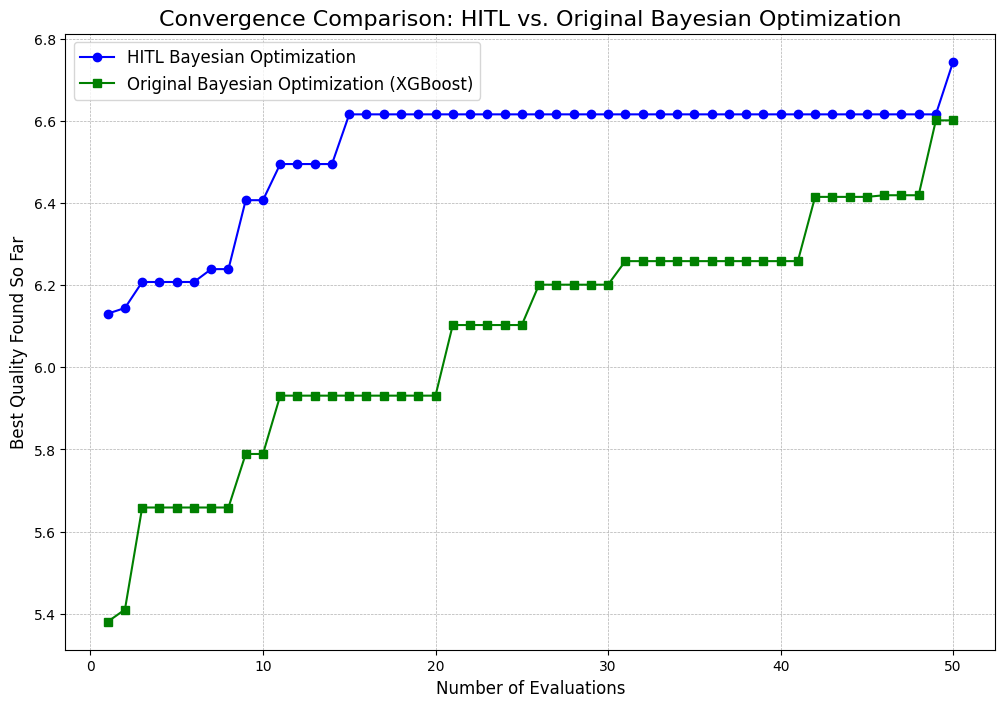

--- Comparison of Best Results ---

Original Bayesian Optimization (XGBoost):
  Best Quality: 6.6013
  Best Profile:
    fixed_acidity: 3.8000
    volatile_acidity: 0.0800
    citric_acid: 0.8922
    residual_sugar: 0.6000
    chlorides: 0.0120
    free_sulfur_dioxide: 64.7861
    total_sulfur_dioxide: 440.0000
    density: 0.9871
    pH: 3.9789
    sulphates: 1.3897
    alcohol: 14.9000

HITL Bayesian Optimization:
  Best Quality: 6.7441
  Best Profile:
    fixed_acidity: 4.9572
    volatile_acidity: 0.3236
    citric_acid: 0.3242
    residual_sugar: 28.5565
    chlorides: 0.0229
    free_sulfur_dioxide: 68.3784
    total_sulfur_dioxide: 141.4763
    density: 1.0351
    pH: 3.4364
    sulphates: 1.6176
    alcohol: 13.4045

--- Analysis ---
The HITL approach found a wine profile with a higher predicted quality.
Quality improvement: 0.1428

By observing the convergence plot, we can analyze which method converged faster to a high-quality solution.
The HITL approach, by incorporating use

In [66]:
# --- Prepare Data for Comparison ---
# Get the convergence data from the original gp_minimize result
# The objective function for gp_minimize returns the negative of quality, so we negate it back
convergence_original = np.maximum.accumulate(-np.array(result_xgb.func_vals))

# Ensure both convergence plots are of the same length for a fair comparison
# We'll cap it at the number of iterations we ran for the HITL loop
num_evaluations = min(len(convergence_hitl), len(convergence_original))
convergence_hitl_plot = convergence_hitl[:num_evaluations]
convergence_original_plot = convergence_original[:num_evaluations]

# --- Plotting the Convergence ---
plt.figure(figsize=(12, 8))
plt.plot(range(1, num_evaluations + 1), convergence_hitl_plot, 'o-', label='HITL Bayesian Optimization', color='blue')
plt.plot(range(1, num_evaluations + 1), convergence_original_plot, 's-', label='Original Bayesian Optimization (XGBoost)', color='green')
plt.title('Convergence Comparison: HITL vs. Original Bayesian Optimization', fontsize=16)
plt.xlabel('Number of Evaluations', fontsize=12)
plt.ylabel('Best Quality Found So Far', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# --- Comparing the Best Results ---
print("--- Comparison of Best Results ---")
print("\nOriginal Bayesian Optimization (XGBoost):")
print(f"  Best Quality: {best_quality_xgb:.4f}")
print("  Best Profile:")
for i, param in enumerate(best_params_xgb):
    print(f"    {X_train.columns[i]}: {param:.4f}")

print("\nHITL Bayesian Optimization:")
print(f"  Best Quality: {best_quality_hitl:.4f}")
print("  Best Profile:")
for i, param in enumerate(best_params_hitl):
    print(f"    {X_train.columns[i]}: {param:.4f}")

# --- Analysis ---
print("\n--- Analysis ---")
if best_quality_hitl > best_quality_xgb:
    print("The HITL approach found a wine profile with a higher predicted quality.")
    print(f"Quality improvement: {best_quality_hitl - best_quality_xgb:.4f}")
else:
    print("The original Bayesian optimization found a wine profile with a slightly better or equal quality.")

print("\nBy observing the convergence plot, we can analyze which method converged faster to a high-quality solution.")
print("The HITL approach, by incorporating user preferences, can sometimes explore more promising regions of the search space, potentially leading to faster discovery of high-quality profiles.")